In [26]:
import torch
model = torch.hub.load('pytorch/vision:v0.6.0', 'resnet50', pretrained=True)
model.eval()

Using cache found in C:\Users\ardui/.cache\torch\hub\pytorch_vision_v0.6.0


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [27]:
import pickle
import urllib
labels = pickle.load(urllib.request.urlopen("https://gist.githubusercontent.com/yrevar/6135f1bd8dcf2e0cc683/raw/d133d61a09d7e5a3b36b8c111a8dd5c4b5d560ee/imagenet1000_clsid_to_human.pkl"))

for t in range(11):
    print(labels[t])

tench, Tinca tinca
goldfish, Carassius auratus
great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias
tiger shark, Galeocerdo cuvieri
hammerhead, hammerhead shark
electric ray, crampfish, numbfish, torpedo
stingray
cock
hen
ostrich, Struthio camelus
brambling, Fringilla montifringilla


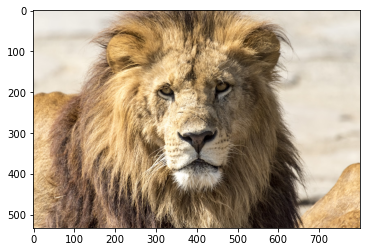

In [28]:
from PIL import Image
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt

# Load the target image and convert it to a tensor.
input_image = Image.open('figure/Lion.jpg')
plt.imshow(input_image)

In [29]:
# https://pytorch.org/docs/stable/torchvision/transforms.html
preprocess = transforms.Compose([
    # Resize to 256 x H or W x 256 (H, W <= 256).
    transforms.Resize(256),
    # 指定されたPIL画像を中央でトリミングします。
    # Crop to 224 x 224 at the center.
    transforms.CenterCrop(224),
    # transform image into a torch tensor
    transforms.ToTensor(),
    # 引数の一つ目のタプルが　RGBの各チャンネルの平均を表し，
    # 二つ目のタプルが標準偏差を表します．これらの平均と標準偏差にあわせて正規化します．
    transforms.Normalize
    (      
        mean = [0.485, 0.456, 0.406],
        std  = [0.229, 0.224, 0.225]
    ),
])

input_tensor = preprocess(input_image)
input_batch  = input_tensor.unsqueeze(0)

with torch.no_grad():
    output = model(input_batch)

# https://pytorch.org/docs/stable/nn.functional.html
prob       = torch.nn.functional.softmax(output[0], dim=0)
# https://pytorch.org/docs/master/generated/torch.topk.html
_, indices = torch.topk(output[0], 10, dim=0)

for index in indices:
    i = index.item()
    print(i, labels[i], prob[i].item())

291 lion, king of beasts, Panthera leo 0.9999070167541504
293 cheetah, chetah, Acinonyx jubatus 5.371029692469165e-05
288 leopard, Panthera pardus 2.028512790275272e-05
260 chow, chow chow 6.304454473138321e-06
276 hyena, hyaena 1.8438341840010253e-06
289 snow leopard, ounce, Panthera uncia 1.774769657458819e-06
292 tiger, Panthera tigris 1.6287476682919078e-06
287 lynx, catamount 9.959771887224633e-07
283 Persian cat 4.2288073132112913e-07
347 bison 3.9012738284327497e-07
